In [209]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

# Load dataframes
awards_players = pd.read_csv('../data/awards_players.csv')
coaches = pd.read_csv('../data/coaches.csv')
players_teams = pd.read_csv('../data/players_teams.csv')
players = pd.read_csv('../data/players.csv')
series_post = pd.read_csv('../data/series_post.csv')
teams_post = pd.read_csv('../data/teams_post.csv')
teams = pd.read_csv('../data/teams.csv')

teamsYY = pd.read_csv('../data/seasonYY/teams.csv')
players_teamsYY = pd.read_csv('../data/seasonYY/players_teams.csv')
coachesYY = pd.read_csv('../data/seasonYY/coaches.csv') 

In [210]:
df_YY = [teamsYY, players_teamsYY, coachesYY]
df_1_10 = [teams, players_teams, coaches]

for idx in range(len(df_YY)):
    # Performing a left join on common columns
    merged_df = pd.merge(df_YY[idx], df_1_10[idx], on=list(df_YY[idx].columns), how='left')

    # Finding columns present in df2 but not in df1
    additional_cols = [col for col in df_1_10[idx].columns if col not in df_YY[idx].columns]

    # Filling missing values in the merged dataframe for additional columns with zeros
    merged_df[additional_cols] = merged_df[additional_cols].fillna(-1) #if replace with 0 the wasPresent won't get set properly

    df_1_10[idx] = pd.concat([df_1_10[idx], merged_df], ignore_index=True)

teams = df_1_10[0]
players_teams = df_1_10[1]
coaches = df_1_10[2]

/var/folders/x8/zhw47ggj1ws_8gnktyfvh4gc0000gn/T/ipykernel_2046/3604859073.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[additional_cols] = merged_df[additional_cols].fillna(-1) #if replace with 0 the wasPresent won't get set properly


In [211]:
# Cleaning Awards Players
# Drop lgID column since all values are 'WNBA'
awards_players.drop('lgID', axis=1, inplace=True)

#Add the missing "award" value for line 30
awards_players.at[28, 'award'] = "Kim Perrot Sportsmanship Award" 
awards_players.head(10)

,playerID,award,year
0,thompti01w,All-Star Game Most Valuable Player,1
1,leslili01w,All-Star Game Most Valuable Player,2
2,leslili01w,All-Star Game Most Valuable Player,3
3,teaslni01w,All-Star Game Most Valuable Player,4
4,swoopsh01w,All-Star Game Most Valuable Player,6
5,douglka01w,All-Star Game Most Valuable Player,7
6,fordch01w,All-Star Game Most Valuable Player,8
7,cashsw01w,All-Star Game Most Valuable Player,10
8,coopemi01w,Coach of the Year,1
9,hugheda99w,Coach of the Year,2


In [212]:
# We can drop 'lgID', since all values are 'WNBA'
players_teams.drop('lgID', axis=1, inplace=True)

In [213]:
# We can drop 'lgID', since all values are 'WNBA'
teams_post.drop('lgID', axis=1, inplace=True)

In [214]:
# We can drop 'lgIDWinner and 'lgIDLoser', since all values are 'WNBA'
series_post.drop(['lgIDWinner', 'lgIDLoser'], axis=1, inplace=True)

In [215]:
# We can drop 'lgID', since all values are 'WNBA'
coaches.drop('lgID', axis=1, inplace=True)

# Rename the column 'stint' to 'stint_coach' to match the other dataframes
coaches.rename(columns={'stint': 'stint_coach'}, inplace=True)

# drop stint_coach
coaches.drop('stint_coach', axis=1, inplace=True)


In [216]:
# We can drop 'firstseason', since all values are '0'
players.drop('firstseason', axis=1, inplace=True)
# We can drop 'lastseason', since all values are '0'
players.drop('lastseason', axis=1, inplace=True)

# We can drop 'collegeOther' since it has a lot of missing values
players.drop('collegeOther', axis=1, inplace=True)

# We can drop 'deathDate' since it is not useful
players.drop('deathDate', axis=1, inplace=True)

# Fill nan values in 'college' with 'none'
players['college'].fillna('none', inplace=True)


# Rename the column 'bioID' to 'playerID' to match the other dataframes
players.rename(columns={'bioID': 'playerID'}, inplace=True)

# Remove players that are coaches
for index, row in players.iterrows():
    # if playerID is in coaches, remove it
    if row['playerID'] in coaches['coachID'].values:
        players.drop(index, inplace=True)

/var/folders/x8/zhw47ggj1ws_8gnktyfvh4gc0000gn/T/ipykernel_2046/1083093864.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  players['college'].fillna('none', inplace=True)


In [217]:
# Filter players with height < 60 inches
players = players[players['height'] >= 60]

In [218]:
# We can drop 'lgID', since all values are 'WNBA'
teams.drop('lgID', axis=1, inplace=True)
# We can drop 'franchID', since values are the same as 'teamID'
teams.drop('franchID', axis=1, inplace=True)
# We can drop 'divID', since all values are null
teams.drop('divID', axis=1, inplace=True)
# We can drop 'seeded', since all values are 0
teams.drop('seeded', axis=1, inplace=True)
# We don't believe that the 'name' attribute is relevant, so we drop it
teams.drop('name', axis=1, inplace=True)
# All of these attributes are always 0, se we can simply drop them
teams.drop(['tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB'], axis=1, inplace=True)
# We don't believe that the 'attend' attribute is relevant, so we drop it
teams.drop('attend', axis=1, inplace=True)
# We don't believe that the 'arena' attribute is relevant, so we drop it
teams.drop('arena', axis=1, inplace=True)

In [219]:
# Filter players with no games played
players_teams = players_teams[players_teams['minutes'] > 0]

### Feature Extraction

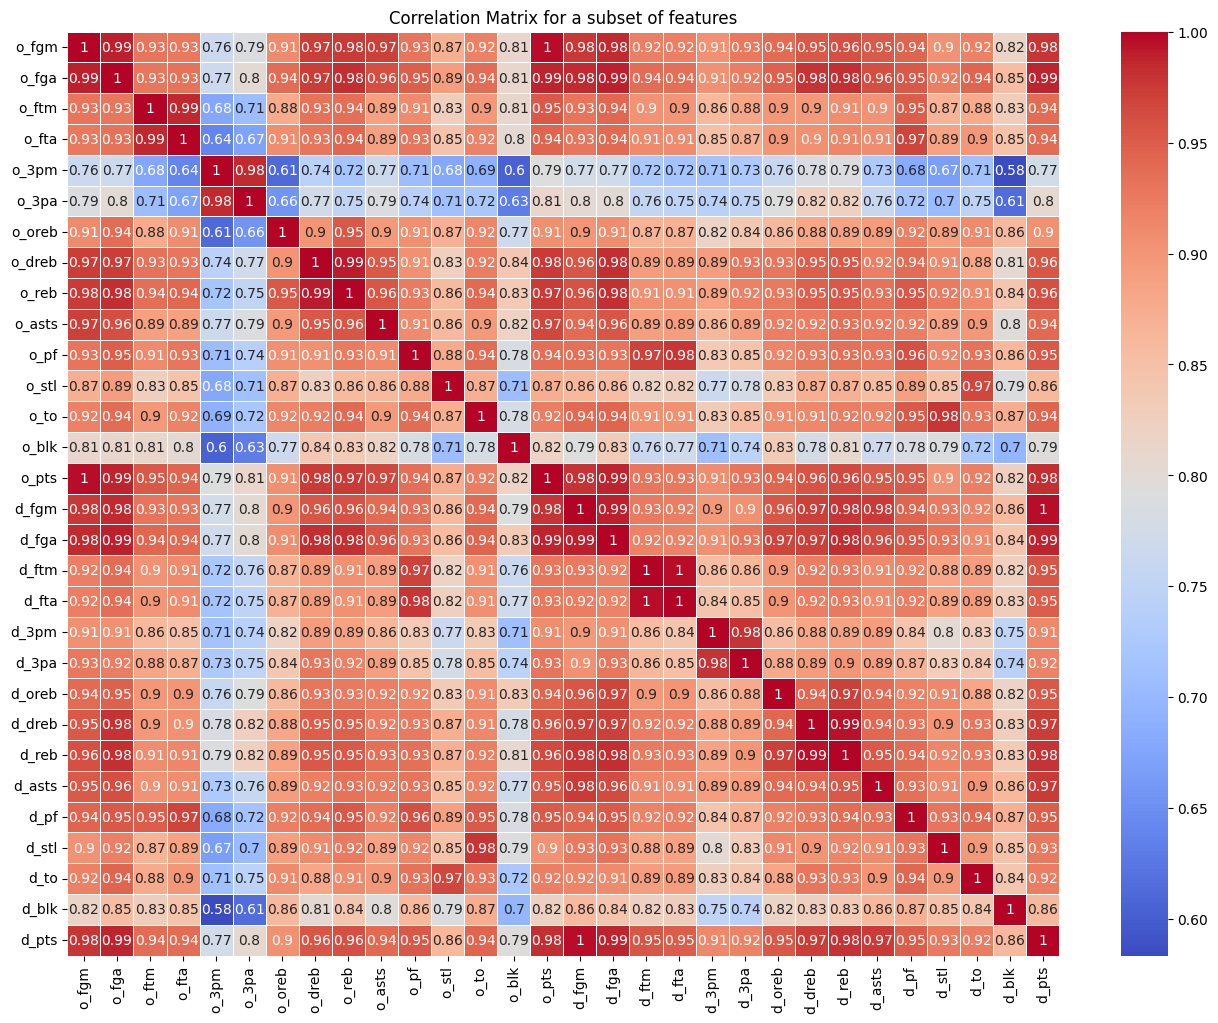

In [220]:
# Select a subset of features
features = ['o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa',
       'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk',
       'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_oreb',
       'd_dreb', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts']

# Calculate the correlation matrix for the subset of features
corr_matrix = teams[features].corr()

# Create a heatmap to visualize the correlation matrix for the subset of features
plt.figure(figsize=(16, 12))
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for a subset of features')
plt.show()

In [221]:
# Drop the columns that are highly correlated
teams.drop(['o_ftm','o_3pm','o_fgm','d_ftm','d_3pm','d_fgm'], axis=1, inplace=True)
teams.drop(['o_oreb', 'o_dreb', 'd_oreb', 'd_dreb'], axis=1, inplace=True)

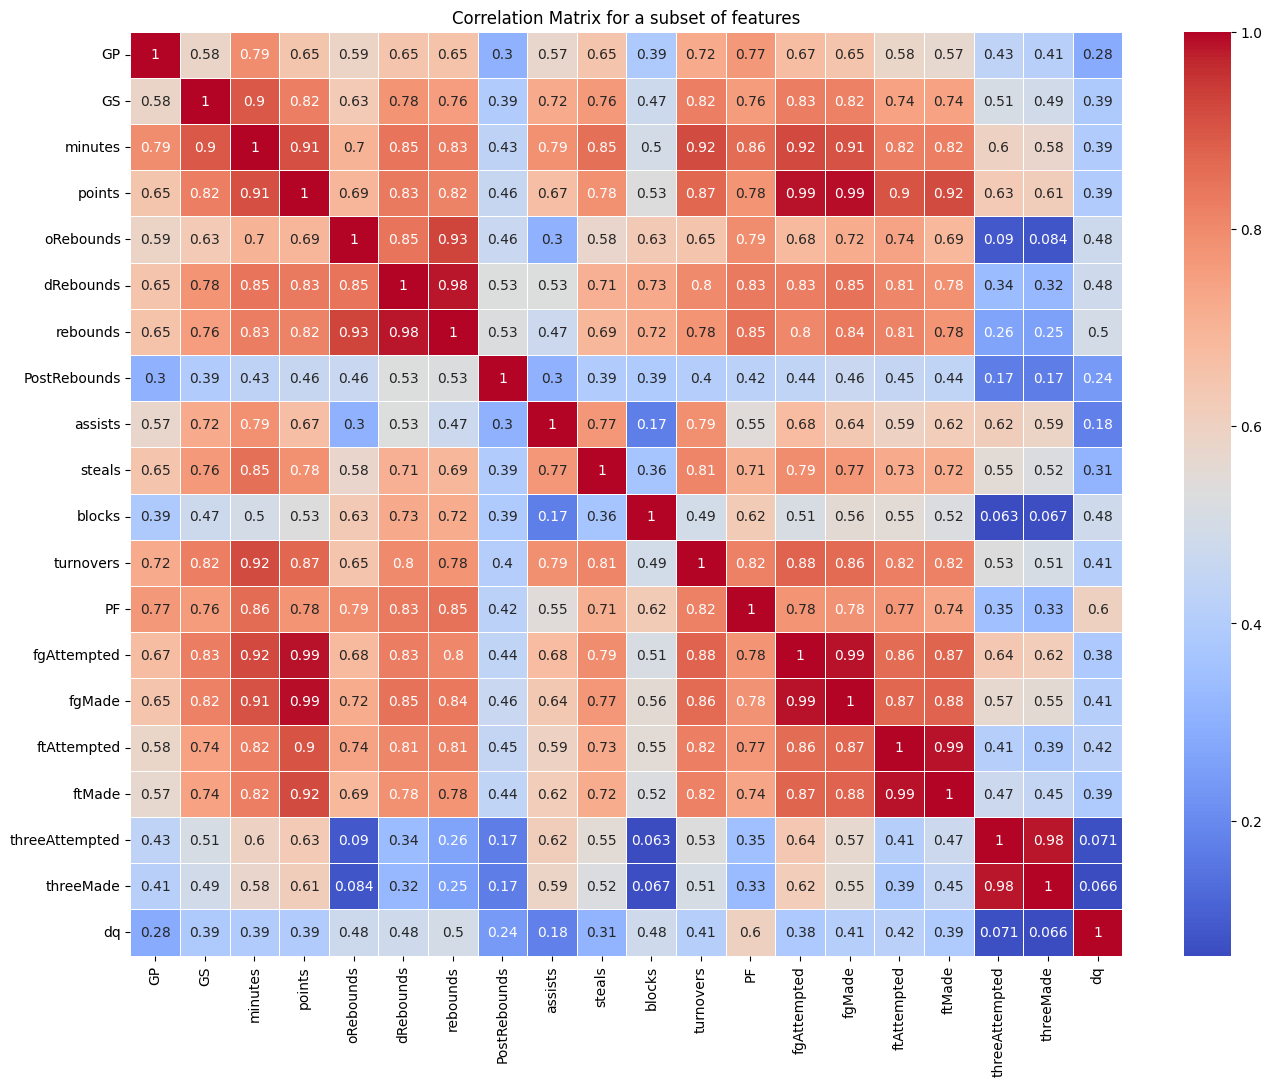

In [222]:
# Select a subset of features
features = ['GP', 'GS', 'minutes',
       'points', 'oRebounds', 'dRebounds', 'rebounds', 'PostRebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
       'ftMade', 'threeAttempted', 'threeMade', 'dq']

# Calculate the correlation matrix for the subset of features
corr_matrix = players_teams[features].corr()

# Create a heatmap to visualize the correlation matrix for the subset of features
plt.figure(figsize=(16, 12))
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix for a subset of features')
plt.show()

In [223]:
players_teams.drop(['dRebounds'], axis=1, inplace=True)

/var/folders/x8/zhw47ggj1ws_8gnktyfvh4gc0000gn/T/ipykernel_2046/4019193551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_teams.drop(['dRebounds'], axis=1, inplace=True)


In [224]:

award_points = {
    'All-Star Game Most Valuable Player': 5,
    'Defensive Player of the Year': 7,
    'Kim Perrot Sportsmanship Award': 0,
    'Most Improved Player': 6,
    'Most Valuable Player': 10,
    'Rookie of the Year': 7,
    'Sixth Woman of the Year': 5,
    'WNBA Finals Most Valuable Player': 9,
    'WNBA All-Decade Team': 10,
    'WNBA All Decade Team Honorable Mention': 5,
    'Coach of the Year': 1
}
awards_players['award_points'] = awards_players['award'].map(award_points)


grouped_df = awards_players.groupby(['playerID', 'year'], as_index=False)['award_points'].sum()

#order it by playerID and then by year
grouped_df = grouped_df.sort_values(by=['playerID', 'year'])


def calculate_last_3_years_sum_awards(player_id, year):
    # Filter the DataFrame for the specific player
    player_data = grouped_df[grouped_df['playerID'] == player_id]
    
    # Get the last 3 years excluding the current year
    last_years = player_data[(player_data['year'] < year) & (player_data['year'] >= year - 3)]
    
    # Sum the award points, treating non-existent years as 0
    total_points = last_years['award_points'].sum()  # Sum existing points
   
    return total_points

# Add a new column for the last 3 years' sum
grouped_df['last_3_years_sum'] = grouped_df.apply(
    lambda row: calculate_last_3_years_sum_awards(row['playerID'], row['year']), axis=1
)

# Calculate all_time_sum
def calculate_all_time_sum(player_id, current_year):
    # Filter the DataFrame for the specific player
    player_data = grouped_df[grouped_df['playerID'] == player_id]
    
    # Filter for years less than the current year
    player_data_current_year = player_data[player_data['year'] < current_year]
    
    # Initialize a variable to hold the sum of award points
    total_points = 0

    # Iterate through the filtered DataFrame
    for index, row in player_data_current_year.iterrows():
        if row["year"] < current_year:  # Check if the year is less than the current year
            total_points += row["award_points"]  # Add award points to total_points

    return total_points

# Add a new column for the all-time sum of points
grouped_df['all_time_sum'] = grouped_df.apply(
    lambda row: calculate_all_time_sum(row['playerID'], row['year']), axis=1
)

# Create a DataFrame for years 1 to 10
years = pd.DataFrame({'year': range(1, 11)})

# Get unique player IDs
unique_players = grouped_df['playerID'].unique()

# Create a DataFrame with all combinations of playerIDs and years
all_combinations = pd.MultiIndex.from_product([unique_players, years['year']], names=['playerID', 'year']).to_frame(index=False)

# Merge with the grouped_df to get existing values
merged_df = all_combinations.merge(
    grouped_df[['playerID', 'year', 'award_points']],
    on=['playerID', 'year'],
    how='left'
)

# Fill NaN values in 'award_points' with 0 (for years with no awards)
merged_df['award_points'] = merged_df['award_points'].fillna(0)


merged_df['last_3_years_sum_awards'] = merged_df.apply(
    lambda row: calculate_last_3_years_sum_awards(row['playerID'], row['year']), axis=1
)

# Add the all_time_sum column
merged_df['all_time_sum_awards'] = merged_df.apply(
    lambda row: calculate_all_time_sum(row['playerID'], row['year']), axis=1
)




In [225]:
# Adding postseason statistics to regular season statistics for each player
for year, lg_data in players_teams.groupby('year'):

    # Retrieve the league statistics
    lg_pts = lg_data['points'].sum() + lg_data['PostPoints'].sum()
    lg_rb = lg_data['rebounds'].sum() + lg_data['PostRebounds'].sum()
    lg_ast = lg_data['assists'].sum() + lg_data['PostAssists'].sum()
    lg_stl = lg_data['steals'].sum() + lg_data['PostSteals'].sum()
    lg_blk = lg_data['blocks'].sum() + lg_data['PostBlocks'].sum()
    lg_to = lg_data['turnovers'].sum() + lg_data['PostTurnovers'].sum()
    lg_pf = lg_data['PF'].sum() + lg_data['PostPF'].sum()
    lg_fga = lg_data['fgAttempted'].sum() + lg_data['PostfgAttempted'].sum()
    lg_fg = lg_data['fgMade'].sum() + lg_data['PostfgMade'].sum()
    lg_fta = lg_data['ftAttempted'].sum() + lg_data['PostftAttempted'].sum()
    lg_ft = lg_data['ftMade'].sum() + lg_data['PostftMade'].sum()
    lg_tra = lg_data['threeAttempted'].sum() + lg_data['PostthreeAttempted'].sum()
    lg_tr = lg_data['threeMade'].sum() + lg_data['PostthreeMade'].sum()

    
    # Calculate the performance of each player in each team
    for playerID, pl_data in lg_data.groupby('playerID'):
        pl_min = pl_data['minutes'].sum() + pl_data['PostMinutes'].sum()
        pl_pts = pl_data['points'].sum() + pl_data['PostPoints'].sum()
        pl_rb = pl_data['rebounds'].sum() + pl_data['PostRebounds'].sum()
        pl_ast = pl_data['assists'].sum() + pl_data['PostAssists'].sum()
        pl_stl = pl_data['steals'].sum() + pl_data['PostSteals'].sum()
        pl_blk = pl_data['blocks'].sum() + pl_data['PostBlocks'].sum()
        pl_fg = pl_data['fgMade'].sum() + pl_data['PostfgMade'].sum()
        pl_ft = pl_data['ftMade'].sum() + pl_data['PostftMade'].sum()
        pl_to = pl_data['turnovers'].sum() + pl_data['PostTurnovers'].sum()
        pl_pf = pl_data['PF'].sum() + pl_data['PostPF'].sum()
        pl_fga = pl_data['fgAttempted'].sum() + pl_data['PostfgAttempted'].sum()
        pl_fta = pl_data['ftAttempted'].sum() + pl_data['PostftAttempted'].sum()
        pl_tr = pl_data['threeMade'].sum() + pl_data['PostthreeMade'].sum()
        pl_tra = pl_data['threeAttempted'].sum() + pl_data['PostthreeAttempted'].sum()

        #remove all the columns used for calculation including post and regular season
       
    
        # add column for all performance of each player to player row in that year
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allPoints'] = pl_pts
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allRebounds'] = pl_rb
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allAssists'] = pl_ast
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allSteals'] = pl_stl
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allBlocks'] = pl_blk
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allFG'] = pl_fg
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allFTA'] = pl_fta
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allFT'] = pl_ft
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allTO'] = pl_to
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allPF'] = pl_pf
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allFGA'] = pl_fga
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allTR'] = pl_tr
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allTRA'] = pl_tra
        players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allMinutes'] = pl_min



players_teams = players_teams.drop(['points', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade', 'minutes'], axis=1)
players_teams = players_teams.drop(['PostPoints', 'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks', 'PostTurnovers', 'PostPF', 'PostfgAttempted', 'PostfgMade', 'PostftAttempted', 'PostftMade', 'PostthreeAttempted', 'PostthreeMade', 'PostMinutes'], axis=1)
## AINDA FALTAM ESTATISTICAS REMOVER E CALCULAR DEOPOIS
    
players_teams.head(20)

/var/folders/x8/zhw47ggj1ws_8gnktyfvh4gc0000gn/T/ipykernel_2046/3250309600.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allPoints'] = pl_pts
/var/folders/x8/zhw47ggj1ws_8gnktyfvh4gc0000gn/T/ipykernel_2046/3250309600.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_teams.loc[(players_teams['playerID'] == playerID) & (players_teams['year'] == year), 'allRebounds'] = pl_rb
/var/folders/x8/zhw47ggj1

,playerID,year,stint,tmID,GP,GS,oRebounds,dq,PostGP,PostGS,...,allBlocks,allFG,allFTA,allFT,allTO,allPF,allFGA,allTR,allTRA,allMinutes
0,abrossv01w,2,0,MIN,26.0,23.0,43.0,2.0,0.0,0.0,...,9.0,114.0,132.0,96.0,85.0,70.0,293.0,19.0,76.0,846.0
1,abrossv01w,3,0,MIN,27.0,27.0,45.0,0.0,0.0,0.0,...,10.0,119.0,116.0,56.0,92.0,73.0,316.0,20.0,60.0,805.0
2,abrossv01w,4,0,MIN,30.0,25.0,44.0,0.0,3.0,3.0,...,12.0,118.0,106.0,77.0,98.0,87.0,307.0,28.0,89.0,861.0
3,abrossv01w,5,0,MIN,22.0,11.0,17.0,0.0,2.0,2.0,...,4.0,57.0,50.0,30.0,46.0,49.0,162.0,22.0,61.0,529.0
4,abrossv01w,6,0,MIN,31.0,31.0,29.0,0.0,0.0,0.0,...,6.0,109.0,73.0,53.0,80.0,86.0,276.0,33.0,82.0,777.0
5,abrossv01w,7,0,MIN,34.0,2.0,44.0,0.0,0.0,0.0,...,1.0,99.0,62.0,41.0,61.0,66.0,241.0,24.0,65.0,724.0
6,abrossv01w,8,0,MIN,34.0,29.0,53.0,0.0,0.0,0.0,...,4.0,132.0,43.0,36.0,68.0,86.0,298.0,45.0,101.0,843.0
7,abrossv01w,9,0,CON,6.0,0.0,3.0,0.0,3.0,2.0,...,0.0,22.0,16.0,12.0,14.0,21.0,60.0,2.0,17.0,170.0
8,adamsjo01w,4,0,MIN,10.0,0.0,10.0,0.0,0.0,0.0,...,3.0,13.0,2.0,2.0,10.0,10.0,33.0,5.0,12.0,96.0
9,aguilel01w,3,0,UTA,28.0,0.0,0.0,0.0,2.0,0.0,...,2.0,14.0,7.0,4.0,11.0,6.0,33.0,11.0,21.0,145.0


#### Count the players that changed from a given team (player_that_left + players_that_joined)

In [ ]:
players_teams['tmID_previous'] = players_teams.groupby('playerID')['tmID'].shift(1)
players_teams['changed_team'] = (players_teams['tmID'] != players_teams['tmID_previous']).astype(int)
players_teams.drop(columns=['tmID_previous'], inplace=True)
players_teams.head(10)


,playerID,year,stint,tmID,GP,GS,oRebounds,dq,PostGP,PostGS,...,allFG,allFTA,allFT,allTO,allPF,allFGA,allTR,allTRA,allMinutes,changed_team
0,abrossv01w,2,0,MIN,26.0,23.0,43.0,2.0,0.0,0.0,...,114.0,132.0,96.0,85.0,70.0,293.0,19.0,76.0,846.0,1
1,abrossv01w,3,0,MIN,27.0,27.0,45.0,0.0,0.0,0.0,...,119.0,116.0,56.0,92.0,73.0,316.0,20.0,60.0,805.0,0
2,abrossv01w,4,0,MIN,30.0,25.0,44.0,0.0,3.0,3.0,...,118.0,106.0,77.0,98.0,87.0,307.0,28.0,89.0,861.0,0
3,abrossv01w,5,0,MIN,22.0,11.0,17.0,0.0,2.0,2.0,...,57.0,50.0,30.0,46.0,49.0,162.0,22.0,61.0,529.0,0
4,abrossv01w,6,0,MIN,31.0,31.0,29.0,0.0,0.0,0.0,...,109.0,73.0,53.0,80.0,86.0,276.0,33.0,82.0,777.0,0
5,abrossv01w,7,0,MIN,34.0,2.0,44.0,0.0,0.0,0.0,...,99.0,62.0,41.0,61.0,66.0,241.0,24.0,65.0,724.0,0
6,abrossv01w,8,0,MIN,34.0,29.0,53.0,0.0,0.0,0.0,...,132.0,43.0,36.0,68.0,86.0,298.0,45.0,101.0,843.0,0
7,abrossv01w,9,0,CON,6.0,0.0,3.0,0.0,3.0,2.0,...,22.0,16.0,12.0,14.0,21.0,60.0,2.0,17.0,170.0,1
8,adamsjo01w,4,0,MIN,10.0,0.0,10.0,0.0,0.0,0.0,...,13.0,2.0,2.0,10.0,10.0,33.0,5.0,12.0,96.0,1
9,aguilel01w,3,0,UTA,28.0,0.0,0.0,0.0,2.0,0.0,...,14.0,7.0,4.0,11.0,6.0,33.0,11.0,21.0,145.0,1


In [227]:
# Drop all columns except the ones we need
players_teams.drop(players_teams.columns.difference(['playerID','tmID', 'year', 'playoff', 'award_points', 'pl_efficiency','last_3_years_avg_pl_efficiency', 'all_years_avg_pl_efficiency', 'changed_team']), axis=1, inplace=True)
players_teams.describe()

,year,changed_team
count,1873.000000,1873.000000
mean,5.320342,0.541377
std,2.904075,0.498418
min,1.000000,0.000000
25%,3.000000,0.000000
50%,5.000000,1.000000
75%,8.000000,1.000000
max,10.000000,1.000000


In [228]:
merged_result = pd.merge(players_teams, merged_df, on=['playerID', 'year'], how='left')

merged_result.describe()
merged_result.head(50)

,playerID,year,tmID,changed_team,award_points,last_3_years_sum_awards,all_time_sum_awards
0,abrossv01w,2,MIN,1,NaN,NaN,NaN
1,abrossv01w,3,MIN,0,NaN,NaN,NaN
2,abrossv01w,4,MIN,0,NaN,NaN,NaN
3,abrossv01w,5,MIN,0,NaN,NaN,NaN
4,abrossv01w,6,MIN,0,NaN,NaN,NaN
5,abrossv01w,7,MIN,0,NaN,NaN,NaN
6,abrossv01w,8,MIN,0,NaN,NaN,NaN
7,abrossv01w,9,CON,1,NaN,NaN,NaN
8,adamsjo01w,4,MIN,1,NaN,NaN,NaN
9,aguilel01w,3,UTA,1,NaN,NaN,NaN


In [229]:
# merge the players_teams and players dataframes
merged_result = merged_result.merge(players, on='playerID', how='left')
merged_result.describe()
merged_result.head(10)

,playerID,year,tmID,changed_team,award_points,last_3_years_sum_awards,all_time_sum_awards,pos,height,weight,college,birthDate
0,abrossv01w,2,MIN,1,NaN,NaN,NaN,F,74.0,169.0,Connecticut,1980-07-09
1,abrossv01w,3,MIN,0,NaN,NaN,NaN,F,74.0,169.0,Connecticut,1980-07-09
2,abrossv01w,4,MIN,0,NaN,NaN,NaN,F,74.0,169.0,Connecticut,1980-07-09
3,abrossv01w,5,MIN,0,NaN,NaN,NaN,F,74.0,169.0,Connecticut,1980-07-09
4,abrossv01w,6,MIN,0,NaN,NaN,NaN,F,74.0,169.0,Connecticut,1980-07-09
5,abrossv01w,7,MIN,0,NaN,NaN,NaN,F,74.0,169.0,Connecticut,1980-07-09
6,abrossv01w,8,MIN,0,NaN,NaN,NaN,F,74.0,169.0,Connecticut,1980-07-09
7,abrossv01w,9,CON,1,NaN,NaN,NaN,F,74.0,169.0,Connecticut,1980-07-09
8,adamsjo01w,4,MIN,1,NaN,NaN,NaN,C,75.0,180.0,New Mexico,1981-05-24
9,aguilel01w,3,UTA,1,NaN,NaN,NaN,G,67.0,165.0,George Washington,1976-10-15


In [230]:
# suppose year 1 is 2000
# if the birthDate is NaN, the age is default will change later
merged_result['birthDate'].fillna('1975-01-01', inplace=True)
merged_result['age'] = merged_result['year'] + 1999 - merged_result['birthDate'].str[:4].astype(int)
merged_result.drop('birthDate', axis=1, inplace=True)


/var/folders/x8/zhw47ggj1ws_8gnktyfvh4gc0000gn/T/ipykernel_2046/444503047.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_result['birthDate'].fillna('1975-01-01', inplace=True)


In [231]:
merged_result[(merged_result['tmID'] == 'ATL') & (merged_result['year'] == 9)].head(10)

,playerID,year,tmID,changed_team,award_points,last_3_years_sum_awards,all_time_sum_awards,pos,height,weight,college,age
71,balesal01w,9,ATL,1,NaN,NaN,NaN,C,79.0,218.0,Duke,23
276,castriz01w,9,ATL,1,NaN,NaN,NaN,F-G,72.0,140.0,none,26
378,desouer01w,9,ATL,1,NaN,NaN,NaN,F-C,77.0,190.0,none,26
635,haynikr01w,9,ATL,1,NaN,NaN,NaN,G,69.0,147.0,Michigan State,25
856,lacyje01w,9,ATL,1,NaN,NaN,NaN,F,75.0,175.0,Pepperdine,25
876,lattaiv01w,9,ATL,1,NaN,NaN,NaN,G,66.0,143.0,North Carolina,24
901,lennobe01w,9,ATL,1,0.0,0.0,16.0,G,68.0,143.0,Louisiana Tech,32
925,littlca01w,9,ATL,1,NaN,NaN,NaN,F,74.0,180.0,North Carolina,23
938,lovelst01w,9,ATL,1,NaN,NaN,NaN,F,76.0,170.0,Purdue,34
983,mannkr01w,9,ATL,1,NaN,NaN,NaN,F,73.0,185.0,UC Santa Barbara,25


In [232]:
# merge teams and teams_post on 'tmID' and 'year'
teams_all = teams.merge(teams_post, on=['tmID', 'year'], how='left') 

teams_all.rename(columns={'W': 'post_W'}, inplace=True)
teams_all.rename(columns={'L': 'post_L'}, inplace=True)

teams_all.fillna(0, inplace=True)

#order by tmID and year
teams_all = teams_all.sort_values(by=['tmID', 'year'])
teams_all.head(10)

,year,tmID,confID,rank,playoff,firstRound,semis,finals,o_fga,o_fta,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,post_W,post_L
0,9,ATL,EA,7.0,N,0,0,0,2258.0,725.0,...,34.0,1.0,16.0,3.0,14.0,2.0,18.0,6825.0,0.0,0.0
1,10,ATL,EA,2.0,Y,L,0,0,2428.0,755.0,...,34.0,12.0,5.0,6.0,11.0,10.0,12.0,6950.0,0.0,2.0
142,11,ATL,EA,-1.0,-1,-1,-1,-1,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0
2,1,CHA,EA,8.0,N,0,0,0,1903.0,577.0,...,32.0,5.0,11.0,3.0,13.0,5.0,16.0,6475.0,0.0,0.0
3,2,CHA,EA,4.0,Y,W,W,L,1780.0,528.0,...,32.0,11.0,5.0,7.0,9.0,15.0,6.0,6500.0,4.0,4.0
4,3,CHA,EA,2.0,Y,L,0,0,1790.0,663.0,...,32.0,11.0,5.0,7.0,9.0,12.0,9.0,6450.0,0.0,2.0
5,4,CHA,EA,2.0,Y,L,0,0,1881.0,590.0,...,34.0,13.0,4.0,5.0,12.0,12.0,12.0,6850.0,0.0,2.0
6,5,CHA,EA,5.0,N,0,0,0,1744.0,590.0,...,34.0,10.0,7.0,6.0,11.0,8.0,12.0,6900.0,0.0,0.0
7,6,CHA,EA,6.0,N,0,0,0,1913.0,624.0,...,34.0,5.0,12.0,1.0,16.0,4.0,16.0,6945.0,0.0,0.0
8,7,CHA,EA,6.0,N,0,0,0,2178.0,777.0,...,34.0,7.0,10.0,4.0,13.0,6.0,14.0,6825.0,0.0,0.0


### Dados do Ano Passado de Cada Equipa


In [233]:
# Drop columns as needed
teams_all.drop(['firstRound', 'semis', 'finals'], axis=1, inplace=True)

# Separate 'year' column to avoid shifting or prefixing it
year_column = teams_all['year']
confID_column = teams_all['confID']
playoff_column = teams_all['playoff']  
# Shift the DataFrame grouped by 'tmID' to get the previous year's data, excluding 'year'
teams_df_last_year = teams_all.drop(columns=['year', 'confID','playoff']).groupby('tmID').shift(1)

# Add prefix to indicate these are from the last year
teams_df_last_year = teams_df_last_year.add_prefix('last_year_')

# Concatenate 'tmID', 'year' (unchanged), and the shifted columns
teams_df_last_year = pd.concat([teams_all['tmID'], year_column, confID_column,playoff_column, teams_df_last_year], axis=1)

# Fill NaN values with 0 for rows without previous-year data
teams_df_last_year.fillna(0, inplace=True)

# Display the first 10 rows of the result
teams_df_last_year.head(10)


,tmID,year,confID,playoff,last_year_rank,last_year_o_fga,last_year_o_fta,last_year_o_3pa,last_year_o_reb,last_year_o_asts,...,last_year_GP,last_year_homeW,last_year_homeL,last_year_awayW,last_year_awayL,last_year_confW,last_year_confL,last_year_min,last_year_post_W,last_year_post_L
0,ATL,9,EA,N,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ATL,10,EA,Y,7.0,2258.0,725.0,598.0,1077.0,492.0,...,34.0,1.0,16.0,3.0,14.0,2.0,18.0,6825.0,0.0,0.0
142,ATL,11,EA,-1,2.0,2428.0,755.0,374.0,1259.0,547.0,...,34.0,12.0,5.0,6.0,11.0,10.0,12.0,6950.0,0.0,2.0
2,CHA,1,EA,N,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,CHA,2,EA,Y,8.0,1903.0,577.0,386.0,935.0,551.0,...,32.0,5.0,11.0,3.0,13.0,5.0,16.0,6475.0,0.0,0.0
4,CHA,3,EA,Y,4.0,1780.0,528.0,428.0,948.0,467.0,...,32.0,11.0,5.0,7.0,9.0,15.0,6.0,6500.0,4.0,4.0
5,CHA,4,EA,Y,2.0,1790.0,663.0,527.0,955.0,496.0,...,32.0,11.0,5.0,7.0,9.0,12.0,9.0,6450.0,0.0,2.0
6,CHA,5,EA,N,2.0,1881.0,590.0,517.0,971.0,499.0,...,34.0,13.0,4.0,5.0,12.0,12.0,12.0,6850.0,0.0,2.0
7,CHA,6,EA,N,5.0,1744.0,590.0,459.0,872.0,426.0,...,34.0,10.0,7.0,6.0,11.0,8.0,12.0,6900.0,0.0,0.0
8,CHA,7,EA,N,6.0,1913.0,624.0,301.0,925.0,493.0,...,34.0,5.0,12.0,1.0,16.0,4.0,16.0,6945.0,0.0,0.0


### Dar Merge com os jogadores

In [ ]:
# Calculate various averages for each 'year' and 'tmID' and assign them to teams_df_last_year
teams_df_last_year['avg_player_height'] = merged_result.groupby(['year', 'tmID'])['height'].transform('mean')
teams_df_last_year['avg_player_weight'] = merged_result.groupby(['year', 'tmID'])['weight'].transform('mean')
teams_df_last_year['avg_player_age'] = merged_result.groupby(['year', 'tmID'])['age'].transform('mean')
teams_df_last_year['avg_player_last_3_years_sum_awards'] = merged_result.groupby(['year', 'tmID'])['last_3_years_sum_awards'].transform('mean')
teams_df_last_year['avg_player_all_time_sum_awards'] = merged_result.groupby(['year', 'tmID'])['all_time_sum_awards'].transform('mean')

# Count the number of players that changed teams: 
# players that joined this year() were in a different team last year)
# + players that left this year (were in this team last year)
dup = players_teams.copy()
dup['joined_team'] = dup.groupby('playerID')['tmID'].shift(1) != dup['tmID']
dup['left_team'] = dup.groupby('playerID')['tmID'].shift(-1) != dup['tmID']
num_players_joined = dup[dup['joined_team']].groupby(['year', 'tmID']).size()
num_players_left = dup[dup['left_team']].groupby(['year', 'tmID']).size()
teams_df_last_year['num_players_changed_team'] = num_players_joined.add(num_players_left, fill_value=0)

#teams_df_last_year['last_3_years_avg_pl_efficiency'] = merged_result.groupby(['year', 'tmID'])['last_3_years_avg_pl_efficiency'].transform('mean')
#teams_df_last_year['all_years_avg_pl_efficiency'] = merged_result.groupby(['year', 'tmID'])['all_years_avg_pl_efficiency'].transform('mean')

# Create new attribute 'tm_efficiency' based on the average of 'last_3_years_avg_pl_efficiency' for each team
# teams_df_last_year['tm_efficiency'] = teams_df_last_year.groupby(['year', 'tmID'])['last_3_years_avg_pl_efficiency'].transform('mean')

# Display the first 10 rows of the updated teams_df_last_year DataFrame
teams_df_last_year.head(10)


,tmID,year,confID,playoff,last_year_rank,last_year_o_fga,last_year_o_fta,last_year_o_3pa,last_year_o_reb,last_year_o_asts,...,last_year_confL,last_year_min,last_year_post_W,last_year_post_L,avg_player_height,avg_player_weight,avg_player_age,avg_player_last_3_years_sum_awards,avg_player_all_time_sum_awards,players_changed_team
0,ATL,9,EA,N,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,72.250000,173.333333,24.833333,3.5,3.5,7
1,ATL,10,EA,Y,7.0,2258.0,725.0,598.0,1077.0,492.0,...,18.0,6825.0,0.0,0.0,72.000000,173.583333,25.250000,3.5,3.5,3
142,ATL,11,EA,-1,2.0,2428.0,755.0,374.0,1259.0,547.0,...,12.0,6950.0,0.0,2.0,71.769231,162.923077,27.461538,0.0,0.0,5
2,CHA,1,EA,N,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,72.700000,170.600000,25.636364,0.0,0.0,4
3,CHA,2,EA,Y,8.0,1903.0,577.0,386.0,935.0,551.0,...,16.0,6475.0,0.0,0.0,73.181818,177.000000,25.250000,0.0,0.0,8
4,CHA,3,EA,Y,4.0,1780.0,528.0,428.0,948.0,467.0,...,6.0,6500.0,4.0,4.0,71.333333,166.666667,25.133333,0.0,0.0,8
5,CHA,4,EA,Y,2.0,1790.0,663.0,527.0,955.0,496.0,...,9.0,6450.0,0.0,2.0,72.000000,170.090909,24.454545,0.0,0.0,4
6,CHA,5,EA,N,2.0,1881.0,590.0,517.0,971.0,499.0,...,12.0,6850.0,0.0,2.0,71.416667,162.500000,24.083333,7.0,7.0,6
7,CHA,6,EA,N,5.0,1744.0,590.0,459.0,872.0,426.0,...,12.0,6900.0,0.0,0.0,71.153846,168.000000,24.692308,NaN,NaN,9
8,CHA,7,EA,N,6.0,1913.0,624.0,301.0,925.0,493.0,...,16.0,6945.0,0.0,0.0,72.700000,170.600000,25.636364,0.0,0.0,4


### Tirar os zeros do primeiro ano em que as equipas aparecem (tirando year 1)


In [235]:

#print(teams_df_last_year.columns)


def fill_last_year_means(row):
    if row['year'] != 1:  # Only consider rows where 'year' is not 1
       
        fields_to_fill = ['last_year_rank', 'last_year_o_fga','last_year_o_fta','last_year_o_3pa','last_year_o_reb','last_year_o_asts','last_year_o_pf',
                                            'last_year_o_stl', 'last_year_o_to', 'last_year_o_blk',
                                            'last_year_o_pts', 'last_year_d_fga', 'last_year_d_fta',
                                            'last_year_d_3pa', 'last_year_d_reb', 'last_year_d_asts',
                                            'last_year_d_pf', 'last_year_d_stl', 'last_year_d_to',
                                            'last_year_d_blk', 'last_year_d_pts', 'last_year_won', 'last_year_lost',
                                            'last_year_GP', 'last_year_homeW', 'last_year_homeL', 'last_year_awayW',
                                            'last_year_awayL', 'last_year_confW', 'last_year_confL',
                                            'last_year_min', 'last_year_post_W', 'last_year_post_L','last_year_o_pf',
                                            'last_year_o_stl', 'last_year_o_to', 'last_year_o_blk',
                                            'last_year_o_pts', 'last_year_d_fga', 'last_year_d_fta',
                                            'last_year_d_3pa', 'last_year_d_reb', 'last_year_d_asts',
                                            'last_year_d_pf', 'last_year_d_stl', 'last_year_d_to',
                                            'last_year_d_blk', 'last_year_d_pts', 'last_year_won', 'last_year_lost',
                                            'last_year_GP', 'last_year_homeW', 'last_year_homeL', 'last_year_awayW',
                                            'last_year_awayL', 'last_year_confW', 'last_year_confL',
                                            'last_year_min', 'last_year_post_W', 'last_year_post_L'] 

        for field in fields_to_fill:
            # Only fill if the field is 0.0
            if row[field] == 0.0:
                
                previous_year_mean = teams_df_last_year[teams_df_last_year['year'] == row['year']][field].mean()
                
                previous_year_mean = round(previous_year_mean, 1)

                
                
                row[field] = previous_year_mean
    return row

teams_df_last_year = teams_df_last_year.apply(fill_last_year_means, axis=1)

#write to banana.csv

teams_df_last_year.to_csv('banana.csv', index=False)



In [236]:

#merge coachID year in with playerID year to get coach award awards_players and coaches

coaches = coaches.merge(awards_players, how='left', left_on=['year', 'coachID'], right_on=['year', 'playerID'])
#drop playerID anda award
coaches.drop(['playerID', 'award'], axis=1, inplace=True)
#order by coachID
coaches = coaches.sort_values(by=['coachID', 'year'])

coaches['mean_wins'] = (coaches['won'] + coaches['post_wins']) / (coaches['lost'] + coaches['post_losses'])

#coaches mean_wins previous year they coached
# we have to check previous entry for same coachID if none found then its the first year
coaches['last_year_mean_wins_coach'] = coaches.groupby('coachID')['mean_wins'].shift(1)
coaches.fillna(0, inplace=True)


meanYear1 = coaches[coaches['year'] == 1]['mean_wins'].mean()
meanYear2 = coaches[coaches['year'] == 2]['mean_wins'].mean()
meanYear3 = coaches[coaches['year'] == 3]['mean_wins'].mean()
meanYear4 = coaches[coaches['year'] == 4]['mean_wins'].mean()
meanYear5 = coaches[coaches['year'] == 5]['mean_wins'].mean()
meanYear6 = coaches[coaches['year'] == 6]['mean_wins'].mean()
meanYear7 = coaches[coaches['year'] == 7]['mean_wins'].mean()
meanYear8 = coaches[coaches['year'] == 8]['mean_wins'].mean()
meanYear9 = coaches[coaches['year'] == 9]['mean_wins'].mean()

#print all in the same line with forma Year1: meanYear1, Year2: meanYear2, ...
print(f"Year1: {meanYear1}, Year2: {meanYear2}, Year3: {meanYear3}, Year4: {meanYear4}, Year5: {meanYear5}, Year6: {meanYear6}, Year7: {meanYear7}, Year8: {meanYear8}, Year9: {meanYear9}")

mean_wins_by_year = {
    1: meanYear1,
    2: meanYear2,
    3: meanYear3,
    4: meanYear4,
    5: meanYear5,
    6: meanYear6,
    7: meanYear7,
    8: meanYear8,
    9: meanYear9
}


def fill_last_year_mean(row):
    if row['last_year_mean_wins_coach'] == 0.0 and row['year'] != 1:
        # Get the mean of the previous year
        return mean_wins_by_year.get(row['year'] - 1, row['last_year_mean_wins_coach'])
    else:
        # Leave the value as it is
        return row['last_year_mean_wins_coach']


coaches['last_year_mean_wins_coach'] = coaches.apply(fill_last_year_mean, axis=1)







#drop won, post_wins, lost, post_losses
coaches.drop(['won', 'post_wins', 'lost', 'post_losses','mean_wins'], axis=1, inplace=True)

# rename awards_points to award_points_coach
coaches.rename(columns={'award_points': 'award_points_coach'}, inplace=True)
coaches.rename(columns={'mean_wins': 'mean_wins_coach'}, inplace=True)


#merge with teams_all
merged_result = teams_df_last_year.merge(coaches, how='left', left_on=['year', 'tmID'], right_on=['year', 'tmID'])
#drop coachID
merged_result.drop('coachID', axis=1, inplace=True)
#fill NaN with 0
merged_result.fillna(0, inplace=True)
#order by year and tmID
merged_result = merged_result.sort_values(by=['tmID', 'year'])

merged_result.head(50)


Year1: 1.4537209923945529, Year2: 1.3600140924702329, Year3: 1.1247610404731148, Year4: 1.1275522713762844, Year5: 1.1908263305322129, Year6: 1.133720939554273, Year7: 1.1367835328367561, Year8: 1.026700788277524, Year9: 1.0569133767276182


,tmID,year,confID,playoff,last_year_rank,last_year_o_fga,last_year_o_fta,last_year_o_3pa,last_year_o_reb,last_year_o_asts,...,last_year_post_W,last_year_post_L,avg_player_height,avg_player_weight,avg_player_age,avg_player_last_3_years_sum_awards,avg_player_all_time_sum_awards,players_changed_team,award_points_coach,last_year_mean_wins_coach
0,ATL,9,EA,N,3.5,2079.8,640.9,502.7,1077.6,520.7,...,1.5,1.5,72.250000,173.333333,24.833333,3.5,3.500000,7,0.0,1.026701
1,ATL,10,EA,Y,7.0,2258.0,725.0,598.0,1077.0,492.0,...,1.6,1.6,72.000000,173.583333,25.250000,3.5,3.500000,3,1.0,0.133333
2,ATL,11,EA,-1,2.0,2428.0,755.0,374.0,1259.0,547.0,...,1.5,2.0,71.769231,162.923077,27.461538,0.0,0.000000,5,0.0,1.000000
3,CHA,1,EA,N,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,72.700000,170.600000,25.636364,0.0,0.000000,4,0.0,0.000000
4,CHA,2,EA,Y,8.0,1903.0,577.0,386.0,935.0,551.0,...,1.0,1.0,73.181818,177.000000,25.250000,0.0,0.000000,8,0.0,0.391304
5,CHA,3,EA,Y,4.0,1780.0,528.0,428.0,948.0,467.0,...,4.0,4.0,71.333333,166.666667,25.133333,0.0,0.000000,8,0.0,1.222222
6,CHA,4,EA,Y,2.0,1790.0,663.0,527.0,955.0,496.0,...,1.1,2.0,72.000000,170.090909,24.454545,0.0,0.000000,4,0.0,1.124761
7,CHA,5,EA,N,2.0,1881.0,590.0,517.0,971.0,499.0,...,1.4,2.0,71.416667,162.500000,24.083333,7.0,7.000000,6,0.0,1.000000
8,CHA,6,EA,N,5.0,1744.0,590.0,459.0,872.0,426.0,...,1.5,1.5,71.153846,168.000000,24.692308,0.0,0.000000,9,0.0,1.190826
9,CHA,6,EA,N,5.0,1744.0,590.0,459.0,872.0,426.0,...,1.5,1.5,71.153846,168.000000,24.692308,0.0,0.000000,9,0.0,0.888889


In [237]:
# Export the cleaned dataframes to CSV files
merged_result.to_csv("../data/clean/merged.csv", index=False)